#  Data Analysis Project: Analyzing climate statistics
### Python for Beginners Workshop at University of Waterloo, Jan 2016
author: Ivana Kajić 


## Introduction

This project is a continuation of the lecture [Python Workshop for Beginners: Data Analysis](http://uwpyb.github.io/materials/lectures/day_2.slides). 
There are several parts to this project:

1. Learning how to fetch CSV files from the internet

2. Load fetched data into the memory of our computer

3. Making nice plots that allow us to answer some questions about the data


These parts can be also done individually (e.g. instead of fetching the data from the internet you can just use what you have stored on your computer) and are meant to be done at your own, individual pace. 

## Data

We will be accessing the climate data provided by the [World Bank’s Climate Change Knowledge Portal](http://data.worldbank.org/topic/climate-change). The datasets we will be using contain historical precipitation and temperature data for a period of time starting from 1901 to 2009 for every country in the world.

In the lecture we have used average monthly values for temperature and precipitation for Canada which can be downloaded either by directly right-clickling on links below and selecting "Save as..." or by going to a website and then right-clicking "Save as...":

<p>Temperature: http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/month/CAN.csv </p>
<p>Precipitation: http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/pr/month/CAN.csv</p>


## 1. Fetching the data
Instead of manually downloading these data sets like we have done in the lecture, we can fetch them directly from the Internet in our Python code! This is a very common practice in programming and is possible because the source of our data (in our case the World's Bank website) provides information on how to access their data.This is called Application Programming Interface (API). 

Let's write a Python script that fetches historical temperature values for Canada. For that, we will need another new library called `requests`, which knows how to deal with websites.

First, create a script called `climate_stats.py` and import the requests package:

In [128]:
import requests

The following line will fetch the temperatures for Canada:

In [155]:
url = "http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv"
print('Getting the data from:', url)
resp = requests.get(url)

Getting the data from: http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv


What happened here? URL, also known as the link, is the text you usually write in your address bar in your browser to go to a certain website. For example, `https://www.google.ca/` is a valid URL and so is `https://www.youtube.com/watch?v=2XID_W4neJo`. Notice how the link to the youtube video is specified by a sequence of characters `2XID_W4neJo` after the equals sign `=` in the link (`https://www.youtube.com/watch?v=2XID_W4neJo`, another video would have a different sequence of characters). 

Similarly, the link we have defined to get the data set contains two pieces of text that specify:
`https://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv`

- tas: we want temperatures
- CAN: for Canada

To see what is it that we wanted to download, simply open your web-browser and copy and paste that link. You can also get number for other countries by replacing CAN with other country codes (e.g. DEU for Germany or HRV for Croatia.)

Then, in the next line:
```python
resp = requests.get(url)
```
we have used function `get` from `requests` and gave it the link as a parameter. This function knows how to get the data at the website with a given URL. There is a simple way to check if everything went well:

In [130]:
print("Response from the website (200 is OK):", resp.status_code)

200


Status codes are messages exchanged among programs on the Internet. Sometimes when you try to open a website in your browser you might get a message: `404 Page not found`. The 404 number is a status code meant to tell your web-browser "Hey, you requested something I don't have... here's a 404 for you". Luckily, we are all good here because 200 means "OK".

To access the data we have received from the website, we can look into the variable `resp.text`. Let's make sure that this is indeed text:

In [131]:
type(resp.text)

str

Let's print first 100 characters to peek into the content:

In [132]:
print(resp.text[:100])

year,data
1901,-7.67241907119751
1902,-7.862711429595947
1903,-7.910782814025879
1904,-8.15572929382


If you are still skeptical (and in programming it's good to be skeptical!), there is an easy way to check that what we have have seen on the website is indeed what we have on our computer now. Go to the website:

```
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv
```

and compare the first few lines there and the first few lines in your code. Convinced now? Good! Let's convert this into an array that we can plot and then analyse what we see.

## 2. Converting the data into NumPy array 

Now, like we have done it in the lecture, we can again use numpy to convert this text into an array of numbers that we can plot. In the lecture, we have done this
```python
temperatures = np.loadtxt('can_avg_temp.csv', delimiter=',', skiprows=1)
```
Where `can_avg_temp.csv` was a file stored on our computer (reminder: `delimiter=1` told numpy that the data in the file is separated by commas and `skiprows=1` said to numpy to skip the first line in the data). Now, instead of giving numpy a file stored on our computer we will give it the text stored in the variable `read.text`. There is a little catch to keep in mind here, we need to tell NumPy where new lines are in this text file. To do this, we can just split the text in `resp.text` into chunks where each chunk is a new row:

In [104]:
import numpy as np

In [105]:
rows = resp.text.split('\n')
rows[:5]

['year,data',
 '1901,-7.67241907119751',
 '1902,-7.862711429595947',
 '1903,-7.910782814025879',
 '1904,-8.155729293823242']

We recognize the data from before, right? The only difference is now how we organized it. Now, we have a list where every element is a row from our `resp.text`. And `numpy.loadtxt` knows how to read this now:

In [106]:
temperatures = np.loadtxt(rows, delimiter=',', skiprows=1)

Question: How many rows and columns are there in our new array `temperatures`? (Hint: use `temperatures.shape` to find out)

In [107]:
temperatures.shape

(112, 2)

In the output we see two numbers, the first one is number of rows and the second one is the number of columns. Seems like we have yearly averages for 111 years, that's a lot of data. You might be asking yourself why 111 years and not 112 like it's written in the output. If you look carefully at the rows we have printed just a few lines above, you will see that the first row does not contain any years but just a string with column labels `year,data`. 

Also, you have might noticed the round brackets `()` we have not seen before. We have seen square brackets for lists `[]` and curly brackets for dictionaries `{}`. The round brackets stand for tuples, another data type very similar to lists, and the elements of a tuple can be accessed in the same way:

In [134]:
print('Number of rows in temperatures:', temperatures.shape[0])

Number of rows in temperatures: 112


Let's find out the year with the highest average using `np.max`:

In [110]:
np.max(temperatures)

2012.0

Uh, if 2012 was the maximal temperature we would be all dead by now! 2012 is the maximal number in our whole data set, and we need a way to tell numpy to look for the maximal values of temperatures only (and not years!). Since our temperatures are stored in the second column we can get the maximum and the minimum by acessing that column only:

In [115]:
max_temp = np.max(temperatures[:, 1])
min_temp = np.min(temperatures[:, 1])

In [160]:
print('Lowest yearly average temperature in Canada over last 111 years was:', min_temp)
print('Highest yearly average temperature in Canada over last 111 years was:', max_temp)

Lowest yearly average temperature in Canada over last 111 years was: -9.52518749237
Highest yearly average temperature in Canada over last 111 years was: -4.70364952087


It would be neat to find out when these maximal and minimal temperatures happened! One way of course would be to print again our temperatures and find the year with these values. But there is a much better way to do it with `np.where`:

In [161]:
min_year = np.where(temperatures[:, 1] == min_temp)
max_year = np.where(temperatures[:, 1] == max_temp)

These two lines ask numpy to tell us the row number of the minimal and maximal temperature. Let's take a look at the output of one of them:

In [162]:
print(min_year)

(array([71]),)


Ok, so we see a number there which looks like it could be the row index, but it's wrapped in all sorts of symbols: there are brackets `()` and the `array()`. Let's try to understand what this means: outer brackets stand there for a tuple, whose elements we can access like the elements of a list:

In [163]:
min_year_index = min_year[0]
print(min_year_index)

[71]


But the brackets say we got a list, so again we need to access the first element in the list:

In [164]:
min_year_index = min_year_index[0]

Finally we have the index of a row which contains the year with the lowest temperature:

In [165]:
print('Lowest average temperature was in:', temperatures[min_year_index])

Lowest average temperature was in: [ 1972.            -9.52518749]


**Exercise**: Get the row containing the year with the highest average temperatures!


The script containing all the statements we have written until now are found in `climate_stats.py`. You can access that script at: 

You can run this script by typing:
```
run climate_stats.py
```
in your IPython console or just
```
python climate_stats.py
```
from your command line interface.

# 3. Plotting the data

Plotting data will allow us to see any trends in temperature change over years. For plotting, let's create a script called `temperature_plots.py`. For plotting we are again going to use the `matplotlib` library, like we have done in the lecture.

In [157]:
import matplotlib.pyplot as plt

In [158]:
# the line below with % is not needed in your code
%matplotlib inline

Let's make the most simple plot of average temperatures over years:

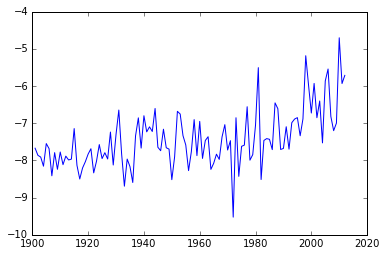

In [167]:
fig, ax = plt.subplots()
ax.plot(temperatures[:, 0], temperatures[:, 1])
plt.show()

There are certain things we can do to make this plot look more informative. First, let's put labels and the title:

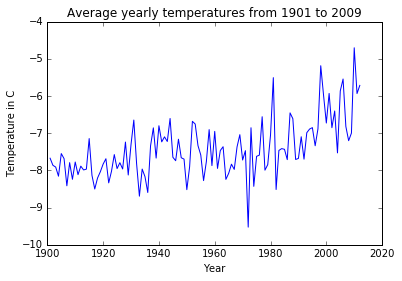

In [168]:
fig, ax = plt.subplots()
ax.plot(temperatures[:, 0], temperatures[:, 1])
ax.set_title('Average temperatures in Canada from 1901 to 2009')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature in C')
plt.show()

We can also get rid of the white space on the right by specifying the limits for our x-axis. Remember that our x-axis represents years, so we can use `set_xlim` to show the data between 1901 and 2009:

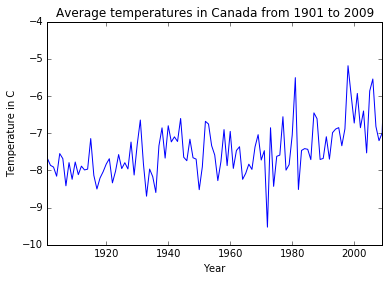

In [187]:
fig, ax = plt.subplots()
ax.plot(temperatures[:, 0], temperatures[:, 1])
ax.set_title('Average temperatures in Canada from 1901 to 2009')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature in C')
ax.set_xlim([1901, 2009])
plt.show()

**Exercise**: Function `plot` lets you also pick a color and the linewidth by specifying parameters `color` and `linewidth`. Pick a color and change the default linewidth to see what happens. Choose among following colors: blue, green, red, cyan, magenta, yellow, black, white (e.g. `color='cyan'`).



# Additional exercises:

1. Write a function which takes a [three-letter country code](http://unstats.un.org/unsd/tradekb/Knowledgebase/Country-Code) as input and returns a variable containing the csv data that can be loaded using `numpy.loadtxt`.